## 데이터 API

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
# 텐서를 받아 X 의 각 원소가 아이템으로 표현되는 tf.data.Dataset을 만든다.
# => 0,1,2 ... , 9
# == tf.data.Dataset.range(10)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [4]:
for item in dataset :
  print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


### 연쇄 변환

In [6]:
dataset = dataset.repeat(3).batch(7)
# repeat(3) : 원본 데이터셋의 아이템을 세차례 반복하는 새로운 데이터셋을 반환한다.
# batch(7) : 이젠 데이터 셋의 아이템을 7개씩 그룹으로 묶는다.
# batch() 메서드의 drop_remainder = True 로 호출하면 길이가 모자란 마지막 배치를 버린다.
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


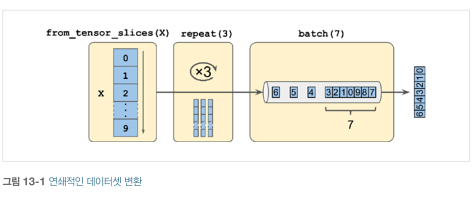

In [7]:
dataset = dataset.map(lambda x : x*2)

In [9]:
for item in dataset:
  print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [10]:
dataset = dataset.apply(tf.data.experimental.unbatch())
# apply : 데이터셋 전체에 변환을 적용한다.
# unbatch() : 7개로 이루어져있는 배치를 해제하고, 하나의 정수 텐서로 만든다.

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


In [12]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, sh

In [13]:
dataset = dataset.filter(lambda x : x < 10)
# filter(): 조건에 맞는 아이템들만 남겨서 dataset 만듬

In [14]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [15]:
for item in dataset.take(3):
  print(item)
  # 데이터셋에 있는 몇개의 아이템만 보고 싶을 때, take() 사용

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


### 데이터 셔플링

In [16]:
# 샘플을 독립적이고, 동일한 분포로 만들고 싶을 때 사용하는 간단한 방법
# => shuffle()

## 원본 데이터셋의 처음 아이템을 buffer_size 개수만큼 추출하여 버퍼에 채운다.
## 새로운 아이템이 요청되면 이 버퍼에서 랜덤하게 하나를 꺼내 반환한다.
## 원본 데이터셋에서 새로운 아이템을 추출하여 비워진 버퍼를 채운다.
## (원본 데이터셋의 모든 아이템이 사용될 때까지 반복된다.)
## 버퍼가 비워질 때까지 계속하여 랜덤하게 아이템을 반환한다.

In [17]:
dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size = 5).batch(7)
# 메모리 용량보다 큰 대규모 데이터셋은 버퍼가 데이터셋에 비해 작기 때문에
# 간단한 셔플링 버퍼 방식으로는 충분하지 않다.
for item in dataset:
  print(item)

tf.Tensor([1 2 5 3 0 4 8], shape=(7,), dtype=int64)
tf.Tensor([7 0 9 6 5 4 7], shape=(7,), dtype=int64)
tf.Tensor([3 9 1 6 0 2 3], shape=(7,), dtype=int64)
tf.Tensor([1 5 2 6 9 8 8], shape=(7,), dtype=int64)
tf.Tensor([4 7], shape=(2,), dtype=int64)


In [18]:
# 대규모 데이터셋을 셔플하는 방법은 원본데이터 자체를 섞는 것이다.
# (원본 데이터가 섞여 있더라도, 일반적으로 에포크마다 한번 더 섞는다.)
## => 그렇지 않으면 에포크마다 동일한 순서가 반복되어 모델에 편향이 추가된다.

# 샘플을 더 섞기 위해 사용하는 방법은 원본 데이터를 여러 파일로 나눈 다음
# 훈련하는 동안 무작위로 읽는 것이다.
## => 하지만 동일한 파일에 있는 샘플은 여전히 함께 처리된다.
### => 이를 피하기 위해 파일 여러개를 무작위로 선택하고
### 파일 에서 동시에 읽은 레코드를 돌아가면서 반환할 수 있다.
### 그다음 shuffle() 메서드를 사용해 그 위에 셔플링 버퍼를 추가 할 수 있다.

#### 여러 개의 CSV로 나누기

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [22]:
import os
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [23]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [24]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [25]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

### 여러 파일에서 한 줄씩 번갈아 읽기

In [26]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed = 42)
# list_files() 함수는 파일 경로를 섞은 데이터셋을 반환한다.
# 이를 원치 않는다면 (바람직한 설정이지만) shuffle = False 로 지정할 수 있다.

In [28]:
for item in filepath_dataset:
  print(item)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

In [29]:
n_readers = 5
dataset = filepath_dataset.interleave(
    # interleave() 메서드를 통해 한번에 다섯개 파일을 한줄 씩 번갈아 읽는다.
    lambda filepath : tf.data.TextLineDataset(filepath).skip(1),
    # 첫번째 행은 열 이름이므로 skip()메서드를 사용하여 건너 뛴다.
    cycle_length = n_readers
)
# interleave() 메서드는 filepath_dataset에 있는 다섯개의 파일 경로에서 데이터를 읽는 데이터셋을 만든다.


In [31]:
for item in dataset:
  print(item)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
tf.Tensor(b'4.0833,49.0,5.603104212860311,1.0221729490022173,1344.0,2.9800443458980044,33.96,-117.39,1.144', shape=(), dtype=string)
tf.Tensor(b'3.2019,27.0,4.9314775160599575,1.0085653104925054,1447.0,3.0985010706638114,37.02,-121.58,2.036', shape=(), dtype=string)
tf.Tensor(b'4.2992,31.0,6.113695090439276,0.9896640826873385,1077.0,2.7829457364341086,32.79,-117.03,1.744', shape=(), dtype=string)
tf.Tensor(b'3.93,11.0,6.474264705882353,1.1452205882352942,1456.0,2.676470588235294,38.81,-121.04,1.634', shape=(), dtype=string)
tf.Tensor(b'4.1833,22.0,6.564231738035264,1.035264483627204,1252.0,3.1536523929471034,37.76,-121.11,1.921', shape=(), dtype=string)
tf.Tensor(b'4.385,35.0,6.356451612903226,1.0403225806451613,1668.0,2.6903225806451614,38.26,-122.73,3.177', shape=(), dtype=string)
tf.Tensor(b'3.2578,38.0,4.408510638297872,0.9617021276595744,1058.0,4.502127659574468,34.07,-118.09,1.842', shape=(), dtype=string)
tf.Tensor(b'2.8807,17.0,5.724288840262

In [32]:
# 기본적으로 interleave() 메서드는 병렬화를 사용하지 않는다.
# => 각 파일에서 한번에 한줄씩 순서대로 읽는다.
## 병렬로 읽고 싶다면 num_parallel_calls 매개변수를 tf.data.experimental.AUTOTUNE 으로 지정한다.

In [33]:
for line in dataset.take(5):
  print(line.numpy())
  # 랜덤한 순서로 잘 가져왔으나, 바이트 스트링으로 되어 있음.

b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'
b'3.226,52.0,5.372469635627531,0.9473684210526315,1157.0,2.3421052631578947,37.96,-121.31,1.076'
b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67'
b'3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442'
b'3.0217,22.0,4.983870967741935,1.1008064516129032,615.0,2.4798387096774195,38.76,-120.6,1.069'


### 데이터 전처리

In [38]:
n_inputs = 8
def preprocess(line):
  # 훈련세트에 있는 각 특성의 평균과 표준편차를 미리 계산했다고 가정한다.
  # csv 한 라인을 받아 파싱한다. ( tf.io.decode_csv() )
  ## => 파라미터 : (파싱할 라인 , 각 열에 대한 기본값을 담은 배열)
  defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
  ## [0.] : 기본값 , n_inputs : 열 갯수 , [tf.constatnt([], dtype=tf.float32)] : float32 타입의 빈 배열
  fileds = tf.io.decode_csv(line, record_defaults=defs)
  # decode_csv : 열마다 한개씩 스칼라 텐서의 리스트를 반환한다.
  x = tf.stack(fileds[:-1])
  # stack() : 모든 텐서를 쌓아 1D 배열을 만든다.
  y = tf.stack(fileds[-1:])
  return (x - X_mean) / X_std, y
  # 입력 특성에서 평균을 빼고 표준편차로 나누어 스케일을 조정한다.

In [39]:
preprocess(b'3.0217,22.0,4.983870967741935,1.1008064516129032,615.0,2.4798387096774195,38.76,-120.6,1.069')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-0.45570153, -0.52405596, -0.18509607,  0.00251731, -0.73855704,
        -0.20285928,  1.4586413 , -0.50757957], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.069], dtype=float32)>)

### 데이터 적재와 전처리를 합치기

In [49]:
def csv_reader_dataset(filepaths , repeat=1 , n_readers=5,
                       n_read_threads=None, shuffle_buffer_size = 10000,
                       n_parse_threads=5, batch_size=32):
  dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
  dataset = dataset.interleave(
      lambda filepath : tf.data.TextLineDataset(filepath).skip(1),
      cycle_length = n_readers , num_parallel_calls=n_read_threads
  )
  dataset = dataset.shuffle(shuffle_buffer_size)
  dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
  return dataset.batch(batch_size).prefetch(1)

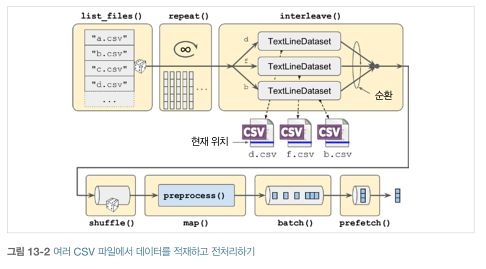

### 프리페치

In [42]:
# 마지막에 prefetch(1) 을 호출하면 데이터셋은 항상 한 배치가 미리 준비되도록 최선을 다한다.
## 훈련 알고리즘이 한 배치로 작업을 하는 동안 이 데이터셋이 동시에 다음 배치를 준비한다.

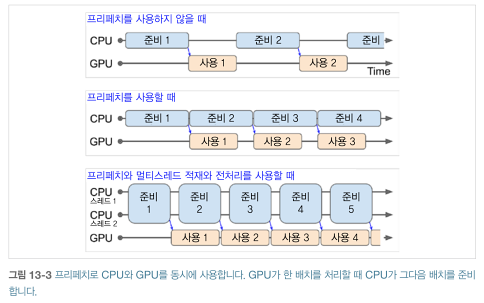

### tf.keras와 데이터셋 사용하기

In [64]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [67]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [68]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 2s 3ms/step - loss: 3.1550 - val_loss: 0.9321
Epoch 2/10
362/362 [==============================] - 1s 2ms/step - loss: 0.8418 - val_loss: 0.7350
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: 0.7371 - val_loss: 0.6641
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: 0.6498 - val_loss: 0.6161
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: 0.6127 - val_loss: 0.5961
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5918 - val_loss: 0.5261
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5661 - val_loss: 0.5224
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.4934 - val_loss: 0.4827
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5502 - val_loss: 0.4643
Epoch 10/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5008 - val_loss: 0.4532

In [69]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.4762


0.47615373134613037

## TFRecord 포맷

In [70]:
# 크기가 다른 연속된 이진 레코드를 저장하는 단순한 이진 포맷임.
## ( 각 레코드는 레코드길이, 길이가 올바른지 체크하는 CRC 체크섬, 실제 데이터,
## 데이터를 위한 CRC 체크섬으로 구성딘다.)

with tf.io.TFRecordWriter('my_data.tfrecord') as f:
  f.write(b'this is the first record')
  f.write(b'And this is the second record')

In [71]:
filepaths = ['my_data.tfrecord']
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
  print(item)

tf.Tensor(b'this is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


### 압축된 TFRecord 파일

In [73]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter('my_compressed.tfrecord', options) as f:
  f.write(b'this is the first record')
  f.write(b'And this is the second record')
  # 네트워크를 통해 읽어야 하는 경우에 사용한다.

In [74]:
dataset = tf.data.TFRecordDataset(['my_compressed.tfrecord'], compression_type="GZIP")

In [75]:
for item in dataset:
  print(item)

tf.Tensor(b'this is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


### 프로토콜 버퍼 개요

In [76]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


In [77]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [78]:
!ls person*

person.desc  person_pb2.py  person.proto


In [79]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com"])  # Person 생성
print(person)  # Person 출력

name: "Al"
id: 123
email: "a@b.com"



In [82]:
print(person.name)  # 필드 읽기
person.name = "Alice" # 필드 수정
print(person.name)
print(person.email[0])  # 배열처럼 사용할 수 있는 반복 필드
person.email.append("c@d.com")  # 이메일 추가
print(person.email[-1])
s = person.SerializeToString()  # 바이트 문자열로 직렬화
print(s)
person2 = Person()  # 새로운 Person 생성
print(person2.ParseFromString(s))  # 바이트 문자열 파싱 (27 바이트)
person == person2  # 동일

Alice
Alice
a@b.com
c@d.com
b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com\x1a\x07c@d.com\x1a\x07c@d.com'
45


True

### 텐서플로 프로토콜 버퍼

In [83]:
# TFRecord 파일에서 사용하는 주요 프로토콜 버퍼는
# 데이터셋에 있는 하나의 샘플을 표현하는 Example 프로토콜 버퍼이다.
# 이 프로토콜 버퍼는 이름을 가진 특성의 리스트를 가지고 있다.

from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [84]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

## 입력 특성 전처리

In [85]:
# 신경망을 위한 데이터를 준비하려면 일반적으로 모든 특성을 
# 수치 특성으로 변환하고 정규화 해야 한다.
# 특히 범주형 특성, 텍스트 특성이 있다면 숫자로 바꾸어야 한다.

mean = np.mean(X_train, axis = 0 , keepdims = True)
stds = np.std(X_train, axis = 0 , keepdims = True)
eps = keras.backend.epsilon()
model = keras.models.Sequential(
    keras.layers.Lambda(lambda inputs : (inputs - means) / (stds + eps))
)

### 원-핫 벡터를 사용해 범주형 특성 인코딩하기

In [87]:
vocab = ['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY', 'ISLAND']
# 가능한 모든 범주의 리스트
indices = tf.range(len(vocab), dtype=tf.int64)
# 범주에 해당하는 인덱스의 텐서를 만든다.
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
# 범주 리스트와 해당 인덱스를 전달하여 룩업 테이블을 위한 초기화 객체를 만든다.
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)
# 룩업테이블을 만든다. 어휘 사전에 없는 범주를 찾으면 해당 범주의 해시값을 이용하여
# OOV 버킷 중 하나에 할당한다. 인덱스는 알려진 범주 다음부터 시작한다.
# ex) 두 개의 oov 버킷의 인덱스는 5,6

In [88]:
categories = tf.constant(['NEAR BAY', 'DESERT', 'INLAND', 'INLAND'])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [89]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot
# 경험적으로 범주 개수가 10 이하이면 일반적으로 원-핫 인코딩을 사용한다.
# 50개 이상이면 임베딩이 선호되는 편이다.

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

### 임베딩을 사용해 범주형 특성 인코딩하기

In [ ]:
# 임베딩은 범주를 표현하는 훈련 가능한 밀집 벡터이다.
# ex ) 'NEAR BAY' 범주는 초기에 [0.131, 0.890] 와 같은 랜덤벡터로 표현된다.
# 임베딩을 훈련할 수 있기 때문에 훈련 도중에 점차 향상된다.

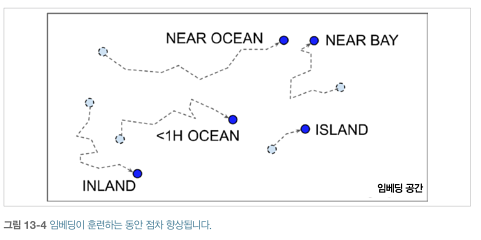

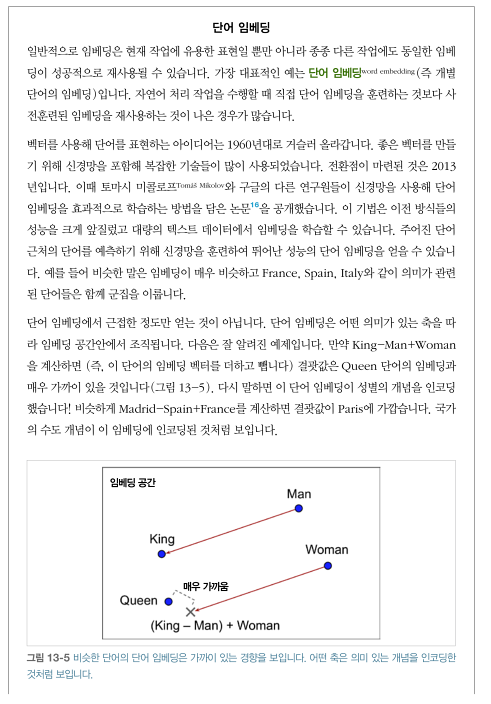

In [90]:
embedding_dim = 2
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets , embedding_dim])
embedding_matrix = tf.Variable(embed_init)
# 범주와 oov 버킷마다 하나의 행이 있고, 임베딩 차원마다 하나의 열을 가진다.

# 임베딩은 작업과 어휘 사전 크기에 따라 10 에서 300 차원을 가진다.

In [93]:
embedding_matrix
# 변수에 저장되어 따라서 훈련 과정에서 경사 하강법으로 학습할 수 있다.

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.3448987 , 0.8412483 ],
       [0.36339653, 0.73383105],
       [0.04602706, 0.7023436 ],
       [0.75336826, 0.73049915],
       [0.8879591 , 0.92973256],
       [0.9634838 , 0.9011042 ],
       [0.08342719, 0.71604145]], dtype=float32)>

In [94]:
categories = tf.constant(['NEAR BAY', 'DESERT', 'INLAND', 'INLAND'])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [95]:
tf.nn.embedding_lookup(embedding_matrix, cat_indices)
# 임베딩 행렬에서 주어진 인덱스에 해당하는 행을 찾는다.
# ex) 룩업 테이블에서 INLAND 범주의 인덱스가 1이라면,
## tf.nn.embedding_lookup() 함수가 이 임베딩 행렬에서 두번째 행에 있는 임베딩을 반환한다.

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.75336826, 0.73049915],
       [0.9634838 , 0.9011042 ],
       [0.36339653, 0.73383105],
       [0.36339653, 0.73383105]], dtype=float32)>

In [99]:
embedding = keras.layers.Embedding(input_dim = len(vocab)+ num_oov_buckets, output_dim=embedding_dim)
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.04676815, -0.00156612],
       [ 0.01680641,  0.04996433],
       [ 0.01521785, -0.01810683],
       [ 0.01521785, -0.01810683]], dtype=float32)>

In [101]:
regular_inputs = keras.layers.Input(shape=[8])
categories = keras.layers.Input(shape=[], dtype=tf.string)
cat_indices = keras.layers.Lambda(lambda cats : table.lookup(cats))(categories)
cat_embed = keras.layers.Embedding(input_dim=6 , output_dim = 2)(cat_indices)
encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs=[regular_inputs, categories], outputs=[outputs])